In [ ]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
iiitdDataset = pd.read_csv('/content/drive/My Drive/BTP AQI/IIIT Delhi AQI.csv')
iiitdDataset.columns = ['Date', 'PM2.5','PM10', 'O3', 'NO2', 'SO2','CO']
maxPM = iiitdDataset[['PM2.5','PM10']].max(axis=1)
aqiColumn = maxPM + iiitdDataset['O3'] + iiitdDataset['NO2'] + iiitdDataset['SO2'] + iiitdDataset['CO']
iiitdDataset['AQI'] = aqiColumn
iiitdDataset['AQI'].values[iiitdDataset['AQI'] > 999] = 999

In [ ]:
iiitdDataset

,Date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
0,28-01-2018,252,202.0,9,16,1,14,292.0
1,29-01-2018,283,168.0,8,15,1,9,316.0
2,30-01-2018,205,173.0,8,13,1,8,235.0
3,31-01-2018,220,199.0,13,18,2,14,267.0
4,01-02-2018,207,200.0,17,17,1,14,256.0
...,...,...,...,...,...,...,...,...
1037,01-12-2020,290,241.0,23,38,8,15,374.0
1038,02-12-2020,264,246.0,26,47,8,23,368.0
1039,03-12-2020,242,382.0,31,42,10,16,481.0
1040,04-12-2020,325,320.0,25,32,6,8,396.0


In [ ]:
iiitdDataset.describe()

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,162.974088,146.555662,19.722649,15.870441,5.701536,12.887716,233.059501
std,80.187163,104.310228,14.195927,9.118365,2.519888,6.956836,114.477438
min,30.000000,16.000000,1.000000,1.000000,1.000000,1.000000,61.000000
25%,108.000000,76.625000,10.000000,9.000000,4.000000,8.000000,156.000000
50%,148.000000,117.000000,17.500000,14.000000,5.000000,11.000000,211.500000
75%,193.750000,178.000000,26.000000,21.000000,7.000000,15.000000,274.000000
max,589.000000,956.000000,177.000000,51.000000,16.000000,50.000000,987.000000


In [ ]:
iiitdDataset['Date'] = pd.to_datetime(iiitdDataset['Date'])

In [ ]:
# We divided that data for analysis into 3 specific groups - Yearly (2018, 2019, 2020), Monthly (Jan to Dec) and then before, during and after the Lockdown (2020). Our analysis is as follows and is presented in the plots below:

# 	PM2.5 and PM10 values show a seasonal effect, with pollution being higher in winter as compared to summer.There is a clear trend that pollution level in Delhi and Ahmedabad falls in the month of July and August. This might be majorly because monsoon season sets in during these months leading to wet deposition and air scrubbing by rainfall.

# 	The pollution level then start rising and reach highest levels in winter months. The months of April-May is considered as the peak crop harvesting month (leading to increase in NO2 levels due to higher fertiliser use) and during the winter months like November-December a lot of the crop residue burning takes place, especially in northern parts of India (leading to higher PM2.5 and PM10 levels).

# 	The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately due to the pandemic and hopefully due to public awareness as well.

# 	The Sulphur Dioxide (SO2) Levels is constantly increasing in Delhi.  This can take place due to SO2 emission hotspots being created from increasing number of thermal power stations.

# 	There is an yearly reduction in Nitrogen Dioxide (NO2) and Sulphur Dioxide (SO2) at Ahmedabad. This may be due to the vehicle emission standards introduced by the government, the increasing use of LPG as domestic fuel instead of coal or fuelwood and also the use of CNG instead of diesel in certain vehicles.

# 	During the lockdown a clear decrease in Pollutants was observed at both Ahmedabad and Delhi. In 2020, The mean value of AQI at IIIT Delhi was 238.35 before the Lockdown, 177.13 during the lockdown and 218.11 after the lockdown. Similarly for Ahmedabad the mean AQI was 211.48 before the lockdown, 175.23 during the lockdown and 219.66 after the lockdown.

In [ ]:
def trend_plot(dataframe,value):
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2018, 2020]), :])

    # Set Title
    axes[0].set_title('Yearly Box Plot\n(Trend)', fontsize=13); 
    axes[1].set_title('Monthly Seasonality Plot', fontsize=13)
    plt.show()

In [ ]:
iiitdDataset.reset_index(inplace=True)

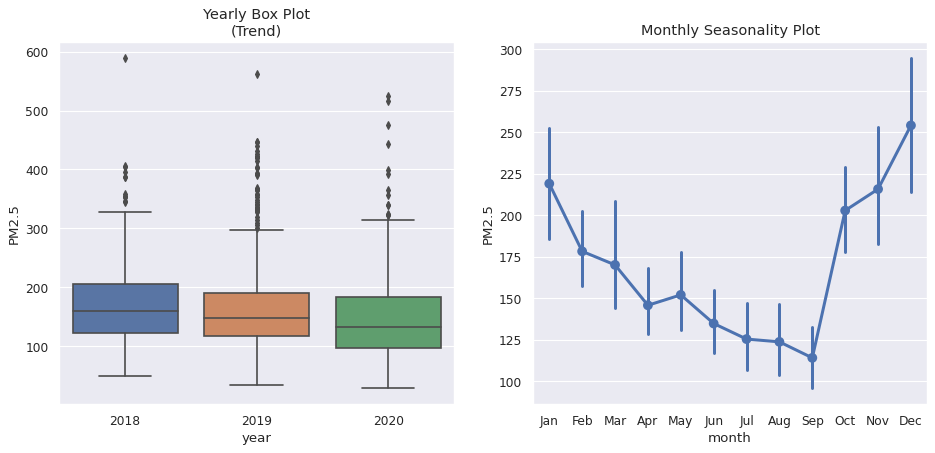

In [ ]:
df = iiitdDataset.copy()
value='PM2.5'
trend_plot(df,value)

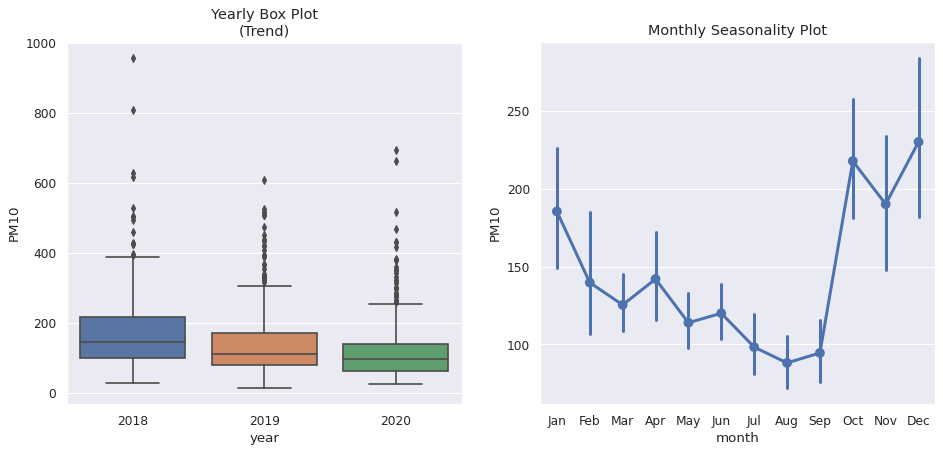

In [ ]:
df = iiitdDataset.copy()
value='PM10'
trend_plot(df,value)

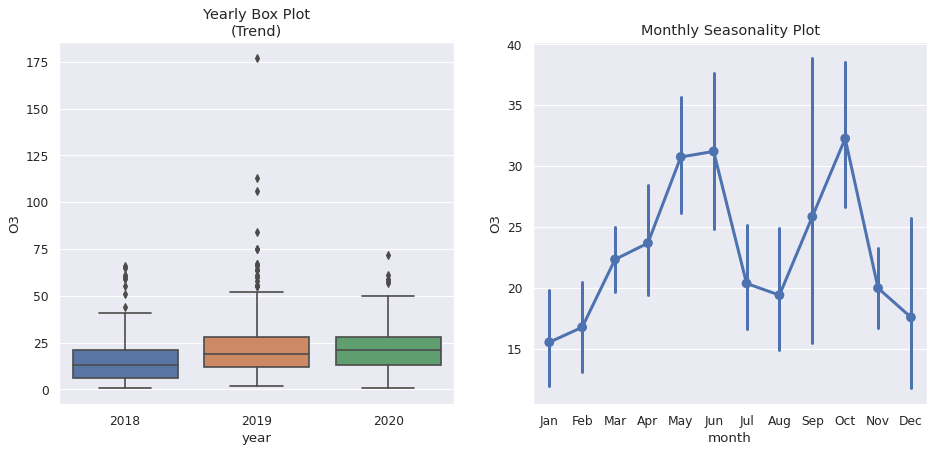

In [ ]:
df = iiitdDataset.copy()
value='O3'
trend_plot(df,value)

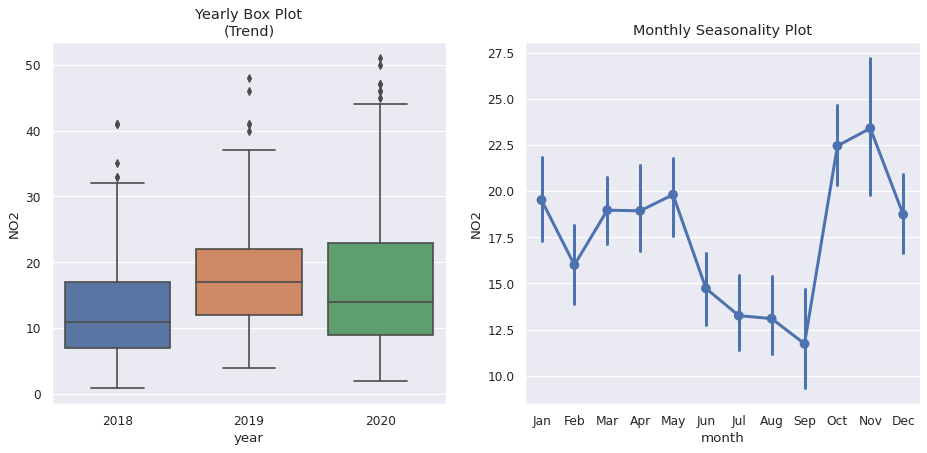

In [ ]:
df = iiitdDataset.copy()
value='NO2'
trend_plot(df,value)

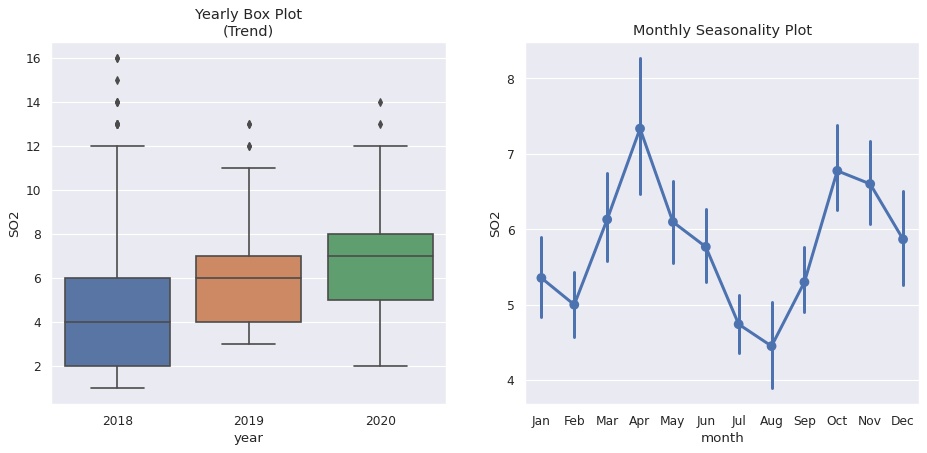

In [ ]:
df = iiitdDataset.copy()
value='SO2'
trend_plot(df,value)

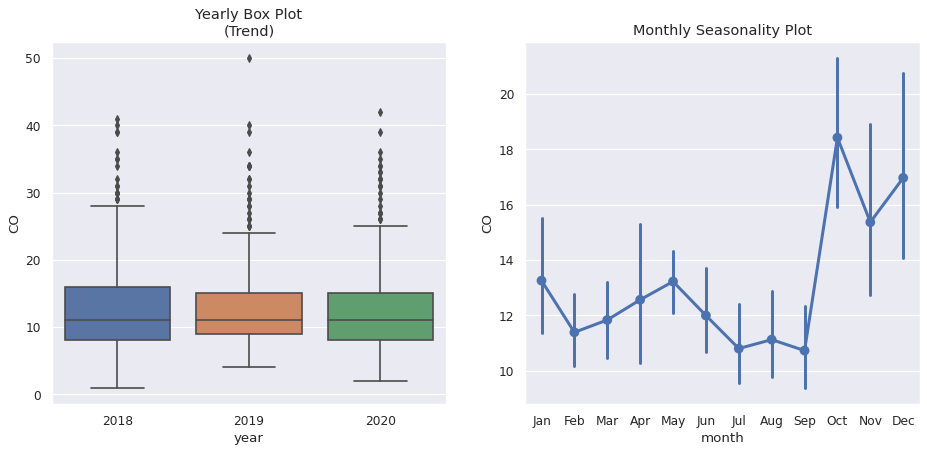

In [ ]:
df = iiitdDataset.copy()
value='CO'
trend_plot(df,value)

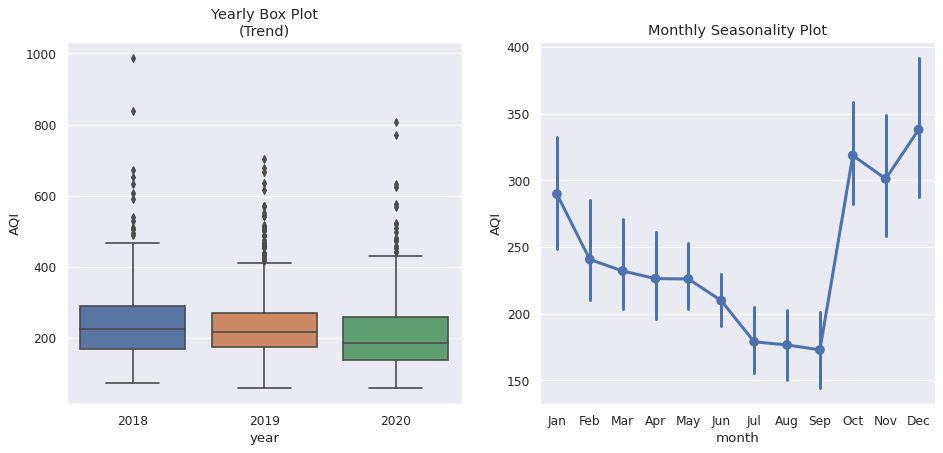

In [ ]:
df = iiitdDataset.copy()
value='AQI'
trend_plot(df,value)

In [ ]:
pollutants = ['PM2.5','PM10', 'O3', 'NO2', 'SO2','CO']

In [ ]:
iiitdDataset2 = iiitdDataset[iiitdDataset['Date'] >= '2020-01-01'] #2020 - Before and After Lockdown
iiitdDataset2 = iiitdDataset2.sort_values(by=['Date'])

In [ ]:
iiitdDataset2

,index,Date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
702,702,2020-01-01,476,431.0,23,25,11,42,577.0
733,733,2020-01-02,186,124.0,17,22,6,13,244.0
762,762,2020-01-03,106,136.0,34,22,7,17,216.0
793,793,2020-01-04,82,47.0,24,3,7,9,125.0
823,823,2020-01-05,137,75.0,14,2,4,12,169.0
...,...,...,...,...,...,...,...,...,...
895,895,2020-12-07,58,80.0,37,11,5,10,143.0
926,926,2020-12-08,62,25.0,8,11,2,7,90.0
957,957,2020-12-09,150,101.0,40,14,7,8,219.0
987,987,2020-12-10,184,198.0,45,24,7,20,294.0


In [ ]:
iiitdDataset2.set_index('Date',inplace=True)

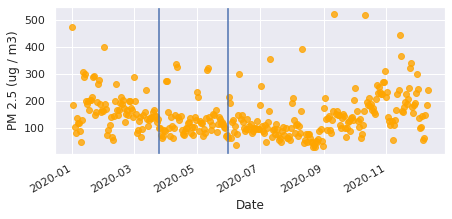

In [ ]:
import datetime as dt

axes = iiitdDataset2['PM2.5'].plot(marker = "o", linestyle='None', alpha = 0.8, figsize = (7, 3), color='orange', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('PM 2.5 (ug / m3)') #Micrograms per Cubic Meter of Air
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

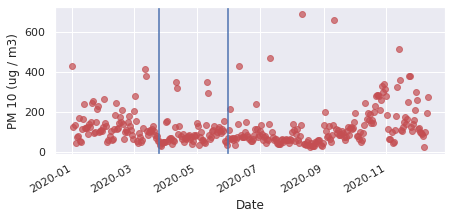

In [ ]:
axes = iiitdDataset2['PM10'].plot(marker = "o", linestyle='None', alpha = 0.7, figsize = (7, 3), subplots = True, color='r')
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('PM 10 (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

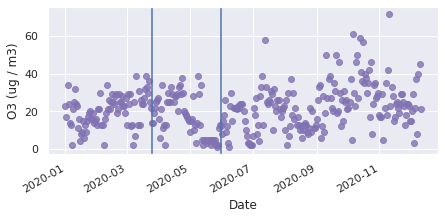

In [ ]:
axes = iiitdDataset2['O3'].plot(marker = "o", linestyle='None', alpha = 0.8, figsize = (7, 3), subplots=True, color='m')
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('O3 (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

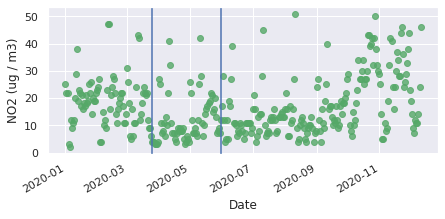

In [ ]:
axes = iiitdDataset2['NO2'].plot(marker = "o", linestyle='None', alpha = 0.8, figsize = (7, 3), color='g', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('NO2 (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

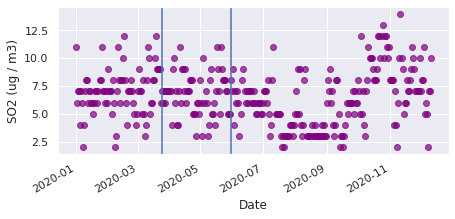

In [ ]:
axes = iiitdDataset2['SO2'].plot(marker = "o", linestyle='None', alpha = 0.7, figsize = (7, 3), color='purple', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('SO2 (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

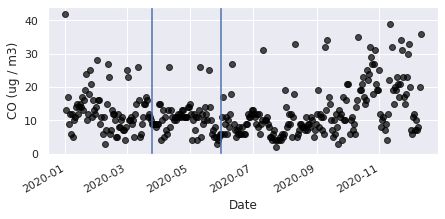

In [ ]:
axes = iiitdDataset2['CO'].plot(marker = "o", linestyle='None', alpha = 0.7, figsize = (7, 3), color='black', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('CO (ug / m3)')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

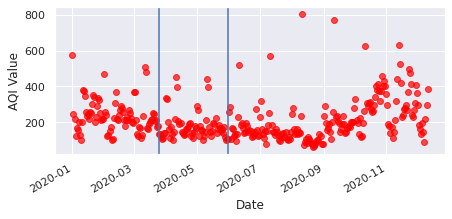

In [ ]:
axes = iiitdDataset2['AQI'].plot(marker = "o", linestyle='None', alpha = 0.7, figsize = (7, 3), color='red', subplots=True)
for ax in axes:
  ax.set_xlabel('Date')
  ax.set_ylabel('AQI Value')
  ax.axvline(dt.datetime(2020, 3, 25))
  ax.axvline(dt.datetime(2020, 5, 31))

In [ ]:
iiitdDataset2.reset_index(inplace=True)

In [ ]:
iiitdDataset2 = iiitdDataset2.drop(columns=['index'])

In [ ]:
iiitdDataset2

,Date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
0,2020-01-01,476,431.0,23,25,11,42,577.0
1,2020-01-02,186,124.0,17,22,6,13,244.0
2,2020-01-03,106,136.0,34,22,7,17,216.0
3,2020-01-04,82,47.0,24,3,7,9,125.0
4,2020-01-05,137,75.0,14,2,4,12,169.0
...,...,...,...,...,...,...,...,...
335,2020-12-07,58,80.0,37,11,5,10,143.0
336,2020-12-08,62,25.0,8,11,2,7,90.0
337,2020-12-09,150,101.0,40,14,7,8,219.0
338,2020-12-10,184,198.0,45,24,7,20,294.0


In [ ]:
AQI_before_Lockdown = iiitdDataset2[(iiitdDataset2['Date'] >= '2020-01-01') & (iiitdDataset2['Date'] <= '2020-03-24')]
AQI_during_Lockdown = iiitdDataset2[(iiitdDataset2['Date'] >= '2020-03-25') & (iiitdDataset2['Date'] <= '2020-05-31')]
AQI_after_Lockdown = iiitdDataset2[iiitdDataset2['Date'] >= '2020-06-01']

In [ ]:
AQI_before_Lockdown.describe()

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,171.333333,132.880952,20.559524,18.714286,6.976190,12.964286,238.345238
std,71.815247,77.116311,8.471570,9.113173,2.053362,6.393608,91.631201
min,47.000000,45.000000,2.000000,2.000000,2.000000,3.000000,99.000000
25%,132.750000,83.000000,14.000000,12.000000,6.000000,9.000000,179.250000
50%,159.500000,115.500000,21.000000,19.000000,7.000000,12.000000,219.500000
75%,199.250000,149.750000,26.000000,22.250000,8.000000,15.250000,262.000000
max,476.000000,431.000000,39.000000,47.000000,12.000000,42.000000,577.000000


In [ ]:
AQI_during_Lockdown.describe()

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,129.102941,95.397059,16.867647,12.073529,6.750000,10.382353,177.132353
std,65.257730,67.246071,10.850276,8.795040,1.903453,4.545063,78.339274
min,62.000000,29.000000,1.000000,3.000000,3.000000,3.000000,98.000000
25%,90.500000,56.750000,5.000000,6.000000,5.000000,7.750000,134.250000
50%,113.000000,76.500000,15.500000,9.000000,7.000000,10.500000,155.500000
75%,140.250000,106.500000,26.250000,16.000000,8.000000,12.000000,188.250000
max,339.000000,352.000000,39.000000,42.000000,11.000000,26.000000,453.000000


In [ ]:
AQI_after_Lockdown.describe()

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
count,188.000000,188.000000,188.00000,188.000000,188.000000,188.000000,188.000000
mean,144.228723,127.893617,23.00000,18.053191,6.281915,13.202128,218.111702
std,84.132032,106.575520,12.55235,11.523858,2.654890,8.034790,127.577818
min,30.000000,25.000000,1.00000,4.000000,2.000000,2.000000,61.000000
25%,88.750000,62.000000,13.75000,10.000000,4.000000,7.000000,133.750000
50%,126.000000,95.500000,22.00000,14.000000,6.000000,11.000000,179.500000
75%,184.000000,146.000000,29.25000,26.250000,8.000000,18.000000,274.000000
max,524.000000,693.000000,72.00000,51.000000,14.000000,39.000000,808.000000


In [ ]:
iiitdDataset

,index,Date,PM2.5,PM10,O3,NO2,SO2,CO,AQI
0,0,2018-01-28,252,202.0,9,16,1,14,292.0
1,1,2018-01-29,283,168.0,8,15,1,9,316.0
2,2,2018-01-30,205,173.0,8,13,1,8,235.0
3,3,2018-01-31,220,199.0,13,18,2,14,267.0
4,4,2018-01-02,207,200.0,17,17,1,14,256.0
...,...,...,...,...,...,...,...,...,...
1037,1037,2020-01-12,290,241.0,23,38,8,15,374.0
1038,1038,2020-02-12,264,246.0,26,47,8,23,368.0
1039,1039,2020-03-12,242,382.0,31,42,10,16,481.0
1040,1040,2020-04-12,325,320.0,25,32,6,8,396.0


In [ ]:
iiitdDataset2 = iiitdDataset[(iiitdDataset['Date'] >= '2020-03-25') & (iiitdDataset['Date'] <= '2020-05-31')] #2020 - Before and After Lockdown

iiitdDataset3 = iiitdDataset[(iiitdDataset['Date'] >= '2019-03-25') & (iiitdDataset['Date'] <= '2019-05-31')] #2019 - Same Time

iiitdDataset2 = iiitdDataset2.sort_values(by=['Date'])

iiitdDataset3 = iiitdDataset3.sort_values(by=['Date'])

iiitdDataset2.set_index('Date',inplace=True)

iiitdDataset3.set_index('Date',inplace=True)

iiitdDataset2 = iiitdDataset2.drop(columns=['index'])

iiitdDataset3 = iiitdDataset3.drop(columns=['index'])

In [ ]:
iiitdDataset2

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
Date,,,,,,,
2020-03-25,102,57.0,14,4,7,9,136.0
2020-03-26,99,37.0,14,4,6,9,132.0
2020-03-27,76,29.0,19,4,7,9,115.0
2020-03-28,64,46.0,22,3,6,9,104.0
2020-03-29,71,50.0,25,3,7,8,114.0
...,...,...,...,...,...,...,...
2020-05-27,106,156.0,1,7,7,3,174.0
2020-05-28,99,53.0,2,8,5,4,118.0
2020-05-29,70,50.0,11,9,5,5,100.0


In [ ]:
iiitdDataset3

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
Date,,,,,,,
2019-03-25,136,96.0,20,18,6,9,189.0
2019-03-26,141,111.0,21,23,6,11,202.0
2019-03-27,143,132.0,28,25,7,16,219.0
2019-03-28,162,197.0,28,24,6,19,274.0
2019-03-29,195,139.0,32,19,8,14,268.0
...,...,...,...,...,...,...,...
2019-05-27,85,99.0,34,28,6,16,183.0
2019-05-28,101,115.0,40,28,8,18,209.0
2019-05-29,131,139.0,37,30,6,20,232.0


In [ ]:
iiitdDataset2['Month'] = iiitdDataset2.index.to_series().dt.strftime('%b')
iiitdDataset3['Month'] = iiitdDataset3.index.to_series().dt.strftime('%b')

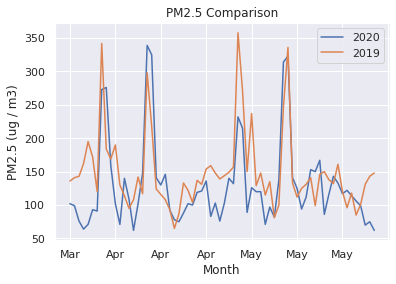

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='PM2.5', label='2020')
ax = iiitdDataset3.plot(x='Month', y='PM2.5', label='2019', ax=ax)
ax.set_ylabel('PM2.5 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('PM2.5 Comparison')
plt.show()

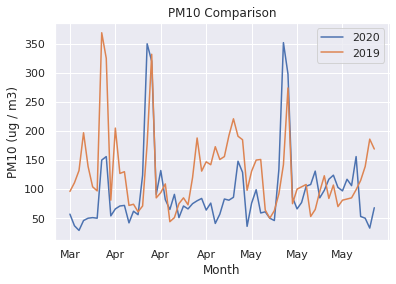

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='PM10', label='2020')
ax = iiitdDataset3.plot(x='Month', y='PM10', label='2019', ax=ax)
ax.set_ylabel('PM10 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('PM10 Comparison')
plt.show()

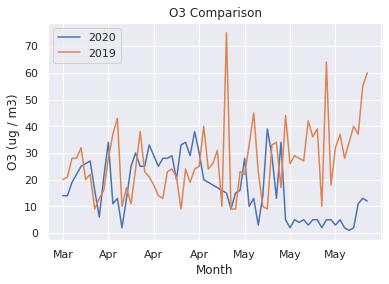

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='O3', label='2020')
ax = iiitdDataset3.plot(x='Month', y='O3', label='2019', ax=ax)
ax.set_ylabel('O3 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('O3 Comparison')
plt.show()

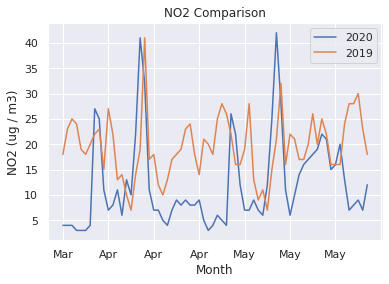

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='NO2', label='2020')
ax = iiitdDataset3.plot(x='Month', y='NO2', label='2019', ax=ax)
ax.set_ylabel('NO2 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('NO2 Comparison')
plt.show()

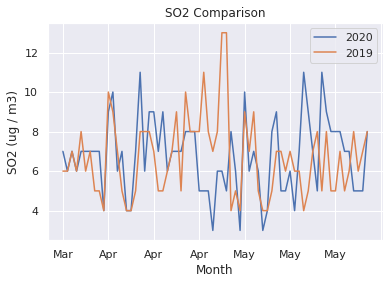

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='SO2', label='2020')
ax = iiitdDataset3.plot(x='Month', y='SO2', label='2019', ax=ax)
ax.set_ylabel('SO2 (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('SO2 Comparison')
plt.show()

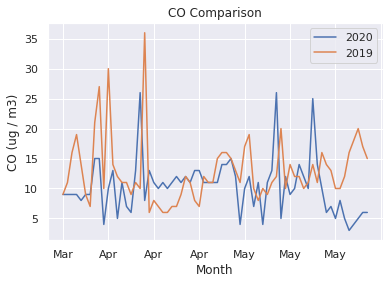

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='CO', label='2020')
ax = iiitdDataset3.plot(x='Month', y='CO', label='2019', ax=ax)
ax.set_ylabel('CO (ug / m3)')
ax.set_xlabel('Month')
ax.set_title('CO Comparison')
plt.show()

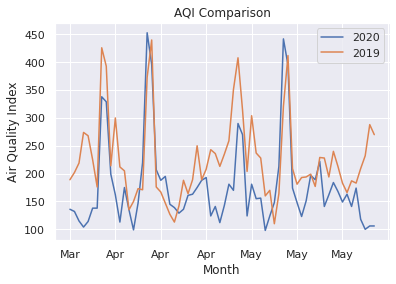

In [ ]:
ax = iiitdDataset2.plot(x='Month', y='AQI', label='2020')
ax = iiitdDataset3.plot(x='Month', y='AQI', label='2019', ax=ax)
ax.set_ylabel('Air Quality Index')
ax.set_xlabel('Month')
ax.set_title('AQI Comparison')
plt.show()